In [1]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [12,8]

Cubic interpolation for various examples:

# $e^x$ 

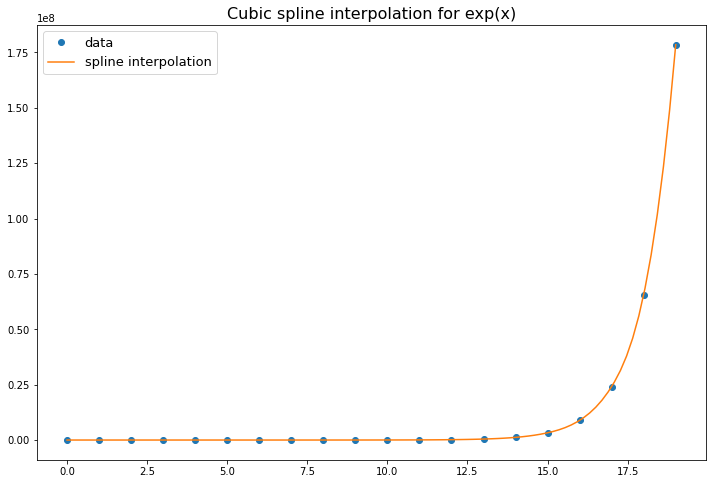

In [3]:
x = np.arange(20)
y = np.exp(x)
cs = CubicSpline(x, y)
xs = np.linspace(0, 19, 100)

plt.plot(x, y, 'o', label='data')
plt.plot(xs, cs(xs), label="spline interpolation")

plt.title('Cubic spline interpolation for exp(x)',fontsize='16')
plt.legend(fontsize=13)

plt.show()

In [4]:
np.exp(8.25) ##exp(X)

3827.6258214399063

In [5]:
cs(8.25) ##Cubic interpolation

array(3822.36091661)

In [6]:
np.exp(2.3) ##exp(X)

9.974182454814718

In [7]:
cs(2.3) ##Cubic interpolation

array(9.95979661)

# US inflation rate from 2001 - 2020 

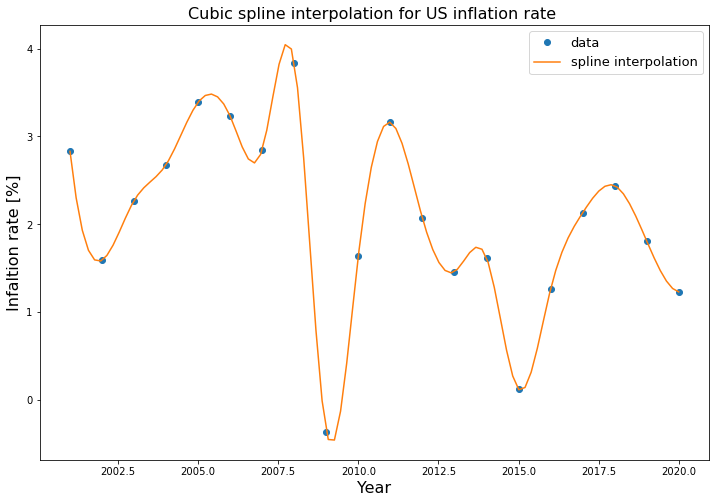

In [8]:
x = np.arange(2001,2021,1)
y = np.array([2.83,1.59,2.27,2.68,3.39,3.23,2.85,3.84,-0.36,1.64,3.16,2.07,1.46,1.62,0.12,1.26,2.13,2.44,1.81,1.23])
cs = CubicSpline(x, y,extrapolate=True )
xs = np.linspace(2001, 2020, 100)

plt.plot(x, y, 'o', label='data')
plt.plot(xs, cs(xs), label="spline interpolation")

plt.title('Cubic spline interpolation for US inflation rate ',fontsize='16')
plt.legend(fontsize=13)
plt.ylabel('Infaltion rate [%]',fontsize='16') 
plt.xlabel('Year',fontsize='16')

plt.show()

Scipy has an option to turn on extrapolate to "True" but i doesn't give good results because it uses polynomial from last data point, so we just get a rising or falling curve for all values outside the interval, meaning, we can't use this scipy algorithm to predict the future rate of inflation.

# Bitcoin price at the first of each month from September 2020 to April 2022

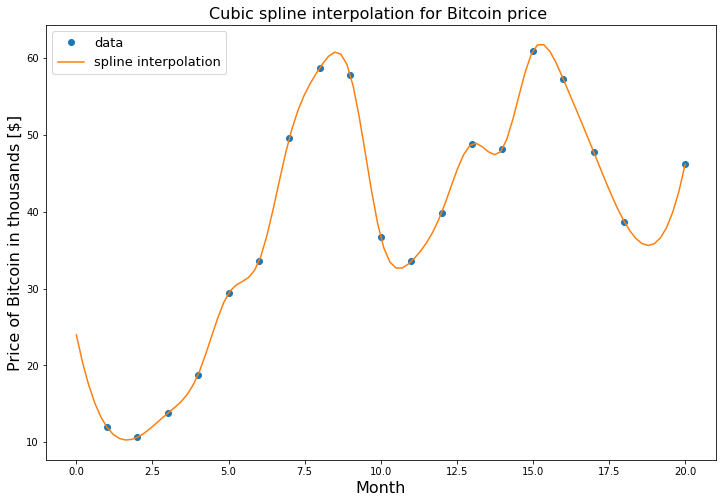

In [9]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20])
y = np.array([11.964,10.626,13.762,18.795,29.391,33.543,49.619,58.726,57.836,36.681,33.524,39.882,48.840,48.162,60.955,57.238,47.743,38.718,46.154])
cs = CubicSpline(x, y)
xs = np.linspace(0, 20, 100)

plt.plot(x, y, 'o', label='data')
plt.plot(xs, cs(xs), label="spline interpolation")

plt.title('Cubic spline interpolation for Bitcoin price ',fontsize='16')
plt.legend(fontsize=13)
plt.ylabel('Price of Bitcoin in thousands [$]',fontsize='16') 
plt.xlabel('Month',fontsize='16')

plt.show()

I left out March 2022 to try and predict its price.

In [10]:
cs(19) #Predicted price of Bitcoin for March 2022

array(35.86099751)

Actual last price of Bitcoin by first of March 2022 was $44 438.

# Random numbers from 1-100 (just for fun)

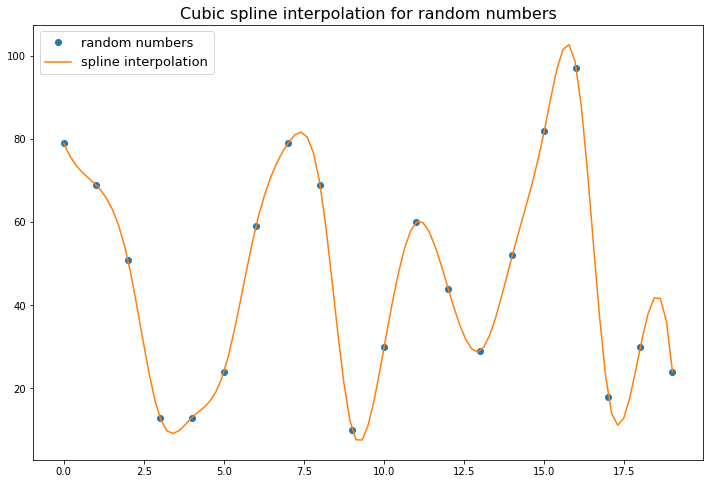

In [11]:
x = np.arange(20)
y = np.round(np.random.rand(20,1) *100)

cs = CubicSpline(x, y)
xs = np.linspace(0, 19, 101)

plt.plot(x, y, 'o', label='random numbers')
plt.plot(xs, cs(xs), label="spline interpolation")

plt.title('Cubic spline interpolation for random numbers',fontsize='16')
plt.legend(fontsize=13)

plt.show()

Judging by the only sane example here, exp(x), cubic spline interpolation algorithm from scipy isn't best at predicting values in-between data, only 20 points on a big interval were used, so maybe that is the problem. 